<a href="https://www.kaggle.com/code/najeebz/cirrhosis-outcomes-ml-models-evaluations?scriptVersionId=157359698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Multi-Class Prediction of Cirrhosis Outcomes](https://www.kaggle.com/competitions/playground-series-s3e26)
### Playground Series - Season 3, Episode 26.
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz) | [LinkedIn](https://www.linkedin.com/in/najeebz) | [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2023). Multi-Class Prediction of Cirrhosis Outcomes. Kaggle.](https://kaggle.com/competitions/playground-series-s3e26)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in propper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/najeebz/cirrhosis-outcomes-ml-models-evaluations)
- [Github Repository](https://github.com/snajeebz/Experiments-Practice-Codebase)
​
____________________________________________________________________

# Loading the Libraries

In [337]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


# Loading the Datasets

In [338]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")

# Analysis

In [339]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [340]:
print(train_df.isnull().sum())
test_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Pre-Processing

In [341]:
# Remove Id Column
train_df.drop(['id'], axis=1, inplace=True)


In [342]:
def colchange(train_df):
    train_df['Sex']=train_df['Sex'].replace(['F', 'M'],[0,1])
    train_df['Sex']=pd.to_numeric(train_df['Sex'])

    #train_df['Ascites']=pd.Categorical(train_df['Ascites'])
    train_df['Ascites']=train_df['Ascites'].replace(['N', 'Y'],[0,1])
    train_df['Ascites']=pd.to_numeric(train_df['Ascites'])
    
    #train_df['Hepatomegaly']=pd.Categorical(train_df['Hepatomegaly'])
    train_df['Hepatomegaly']=train_df['Hepatomegaly'].replace(['N', 'Y'],[0,1])
    train_df['Hepatomegaly']=pd.to_numeric(train_df['Hepatomegaly'])
    
    #train_df['Spiders']=pd.Categorical(train_df['Spiders'])
    train_df['Spiders']=train_df['Spiders'].replace(['N', 'Y'],[0,1])
    train_df['Spiders']=pd.to_numeric(train_df['Spiders'])

    #train_df['Edema']=pd.Categorical(train_df['Edema'])
    train_df['Edema']=train_df['Edema'].replace(['N', 'S', 'Y'],[0.2,0.4,0.6])
    train_df['Edema']=pd.to_numeric(train_df['Edema'])

    #train_df['Drug']=pd.Categorical(train_df['Drug'])
    train_df['Drug']=train_df['Drug'].replace(['D-penicillamine', 'Placebo'],[0,1])
    train_df['Drug']=pd.to_numeric(train_df['Drug'])
    return(train_df)
train_df=colchange(train_df)
test_df=colchange(test_df)
train_df['Status']=pd.Categorical(train_df['Status'])
#train_df['Status']=train_df['Status'].replace(['C', 'CL', 'D'],[0.2,0.4,0.6])
#train_df['Status']=pd.to_numeric(train_df['Status'])


# Training Models

## Scaling Function

In [343]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

## Model Training Evaluation Function

In [344]:
def evaluate(y_test,ypred):
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import plotly.express as px
    y_test['Status']=y_test['Status'].replace(['C', 'CL', 'D'],[1,2,3])
    y_pred=pd.DataFrame(data=ypred, columns=['Status'])
    y_pred['Status']=y_pred['Status'].replace(['C', 'CL', 'D'],[1,2,3])

    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    cm = confusion_matrix(y_test, y_pred)
    # plot the heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm,annot=True, cmap='Blues')

## Preparing Test and Train Datasets

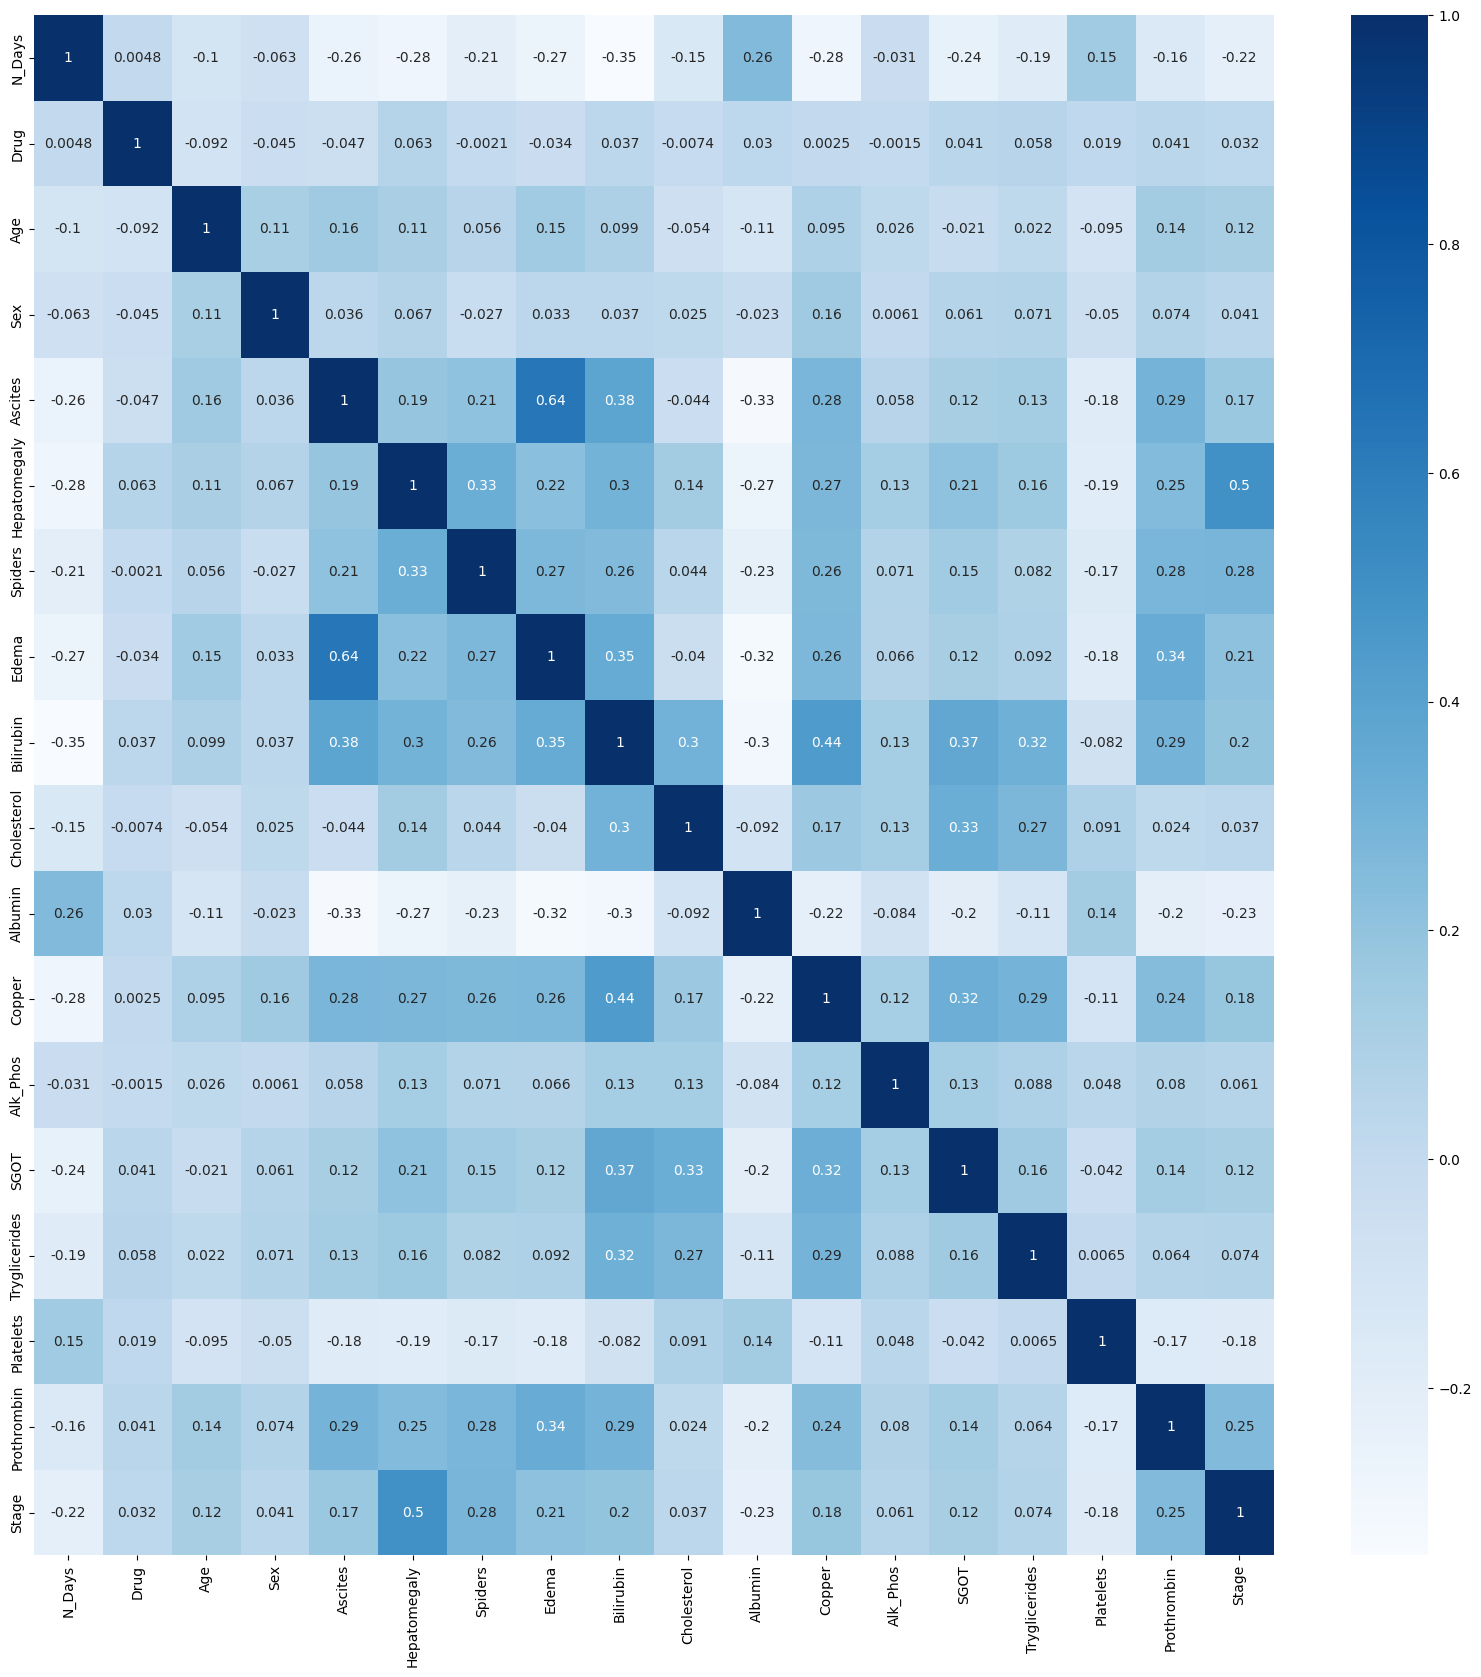

In [345]:
train_df['Status']=pd.Categorical(train_df['Status'])
X=train_df[['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']]
y=train_df[['Status']]
train_df['Status']=train_df['Status'].replace(['C', 'CL', 'D'],[0.2,0.4,0.6])

# calculate the correlation matrix on the numeric columns
corr = train_df.select_dtypes('number').corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='Blues')


In [346]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 6703 to 7270
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Status  6324 non-null   category
dtypes: category(1)
memory usage: 55.7 KB


## Training K-Nearest Neighbour Classifier

Accuracy:  0.7912713472485768
Recall Score:  0.5438700486580632


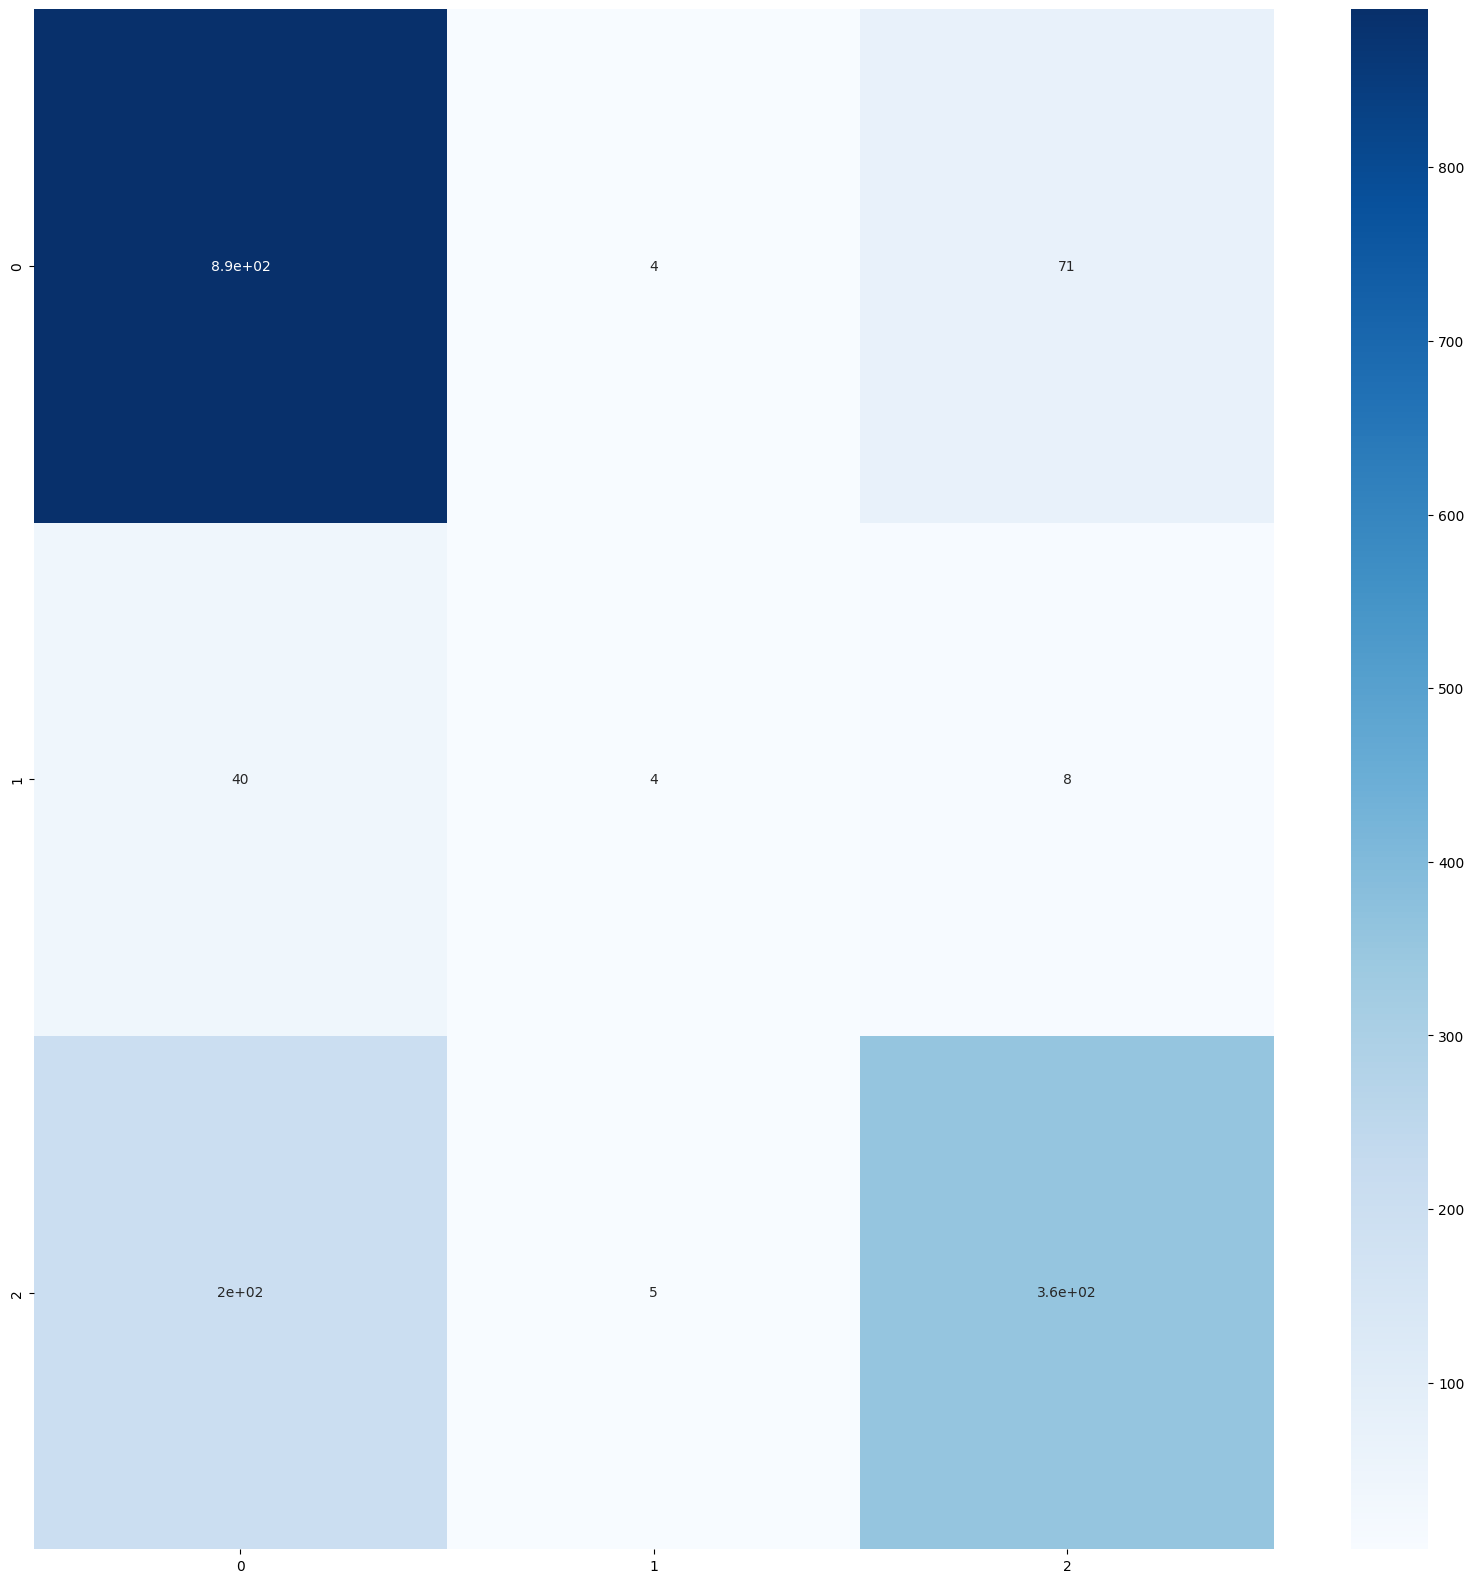

In [347]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
evaluate(y_test,y_pred)

## Training Random Forest Classifier

Training the model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy:  0.8368121442125237
Recall Score:  0.6070545752374464


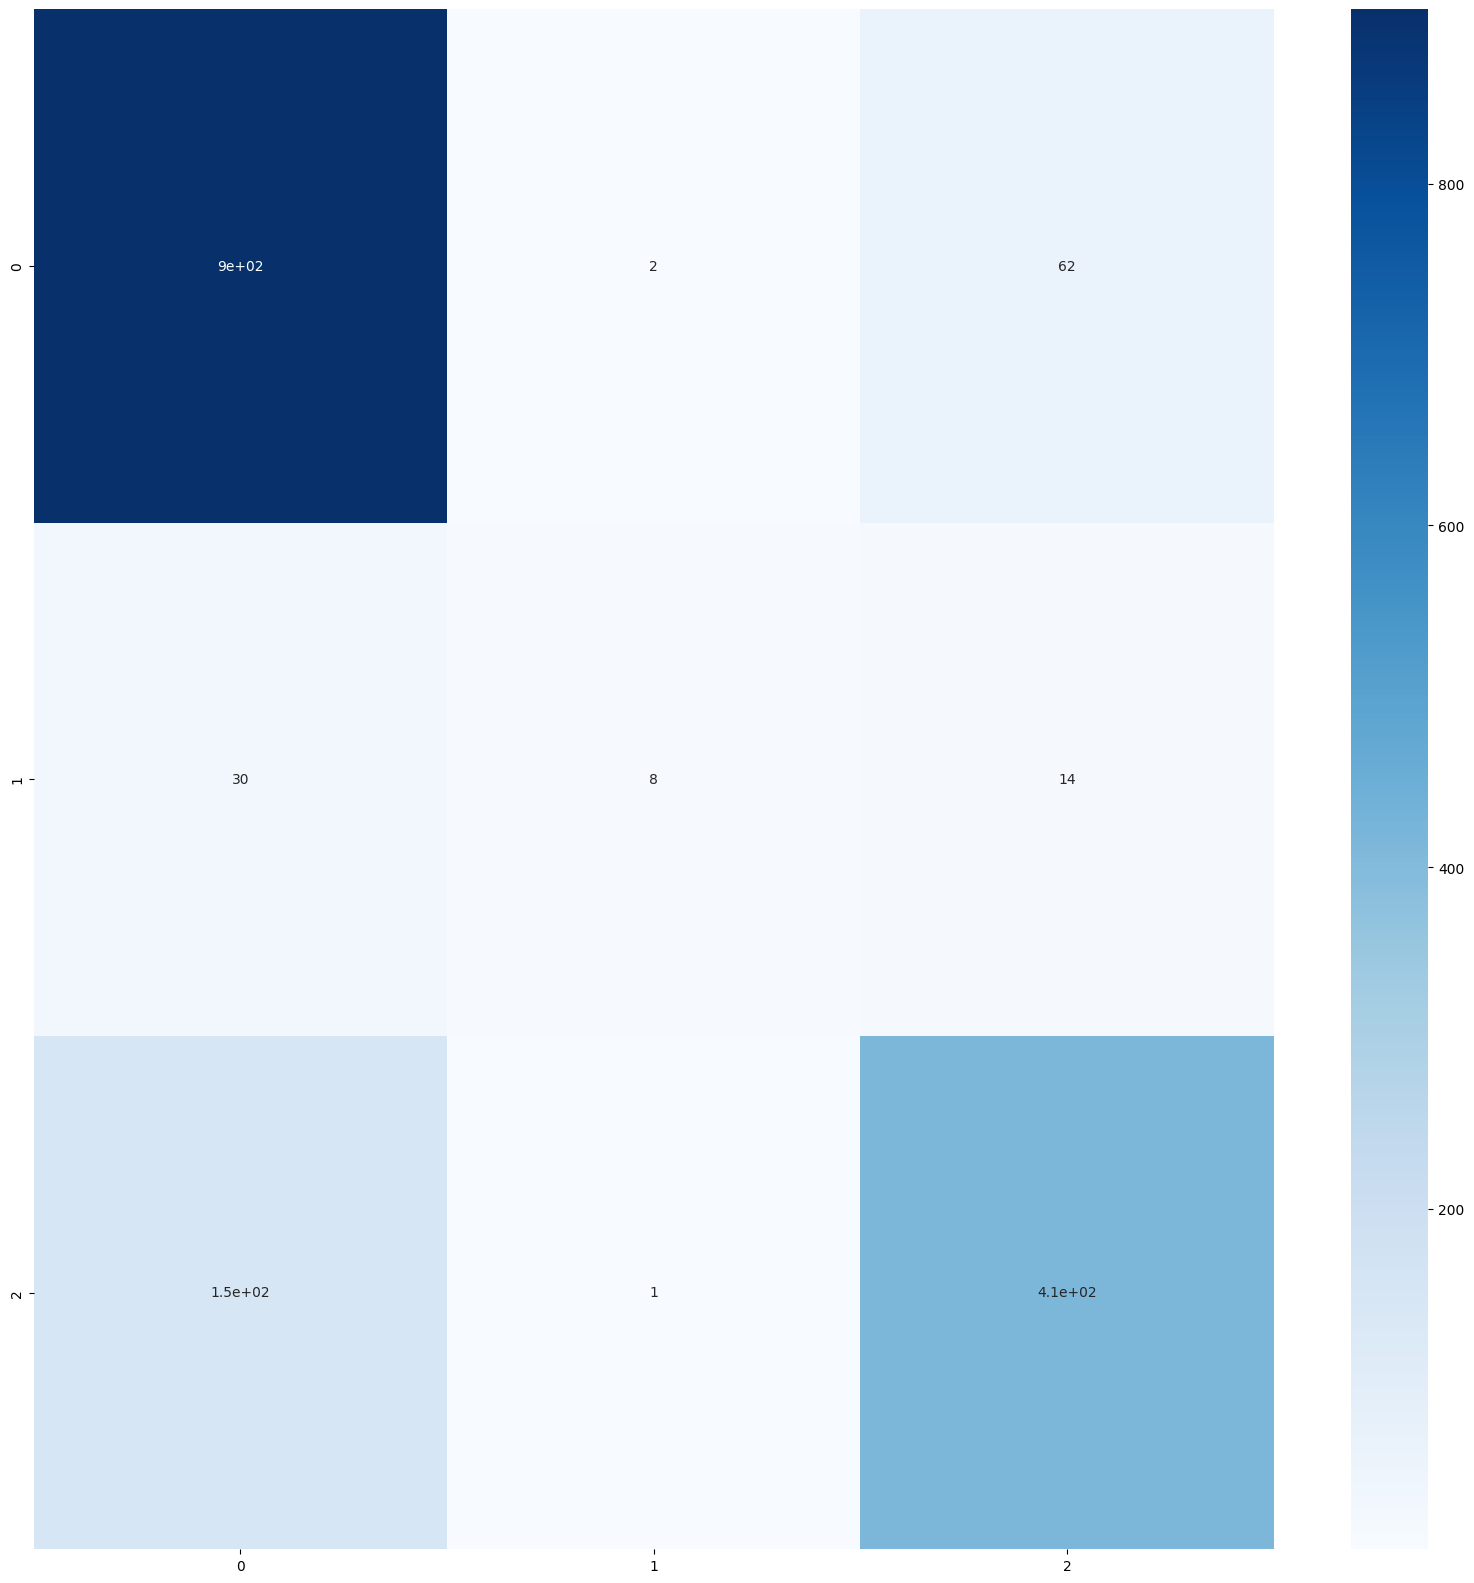

In [348]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_jobs=-1,verbose=1) 
print ('Training the model')
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
evaluate(y_test,y_pred)

## Training Naive Bayes Classifier

0.7556925996204934
Accuracy:  0.7514231499051234
Recall Score:  0.5027276869311003


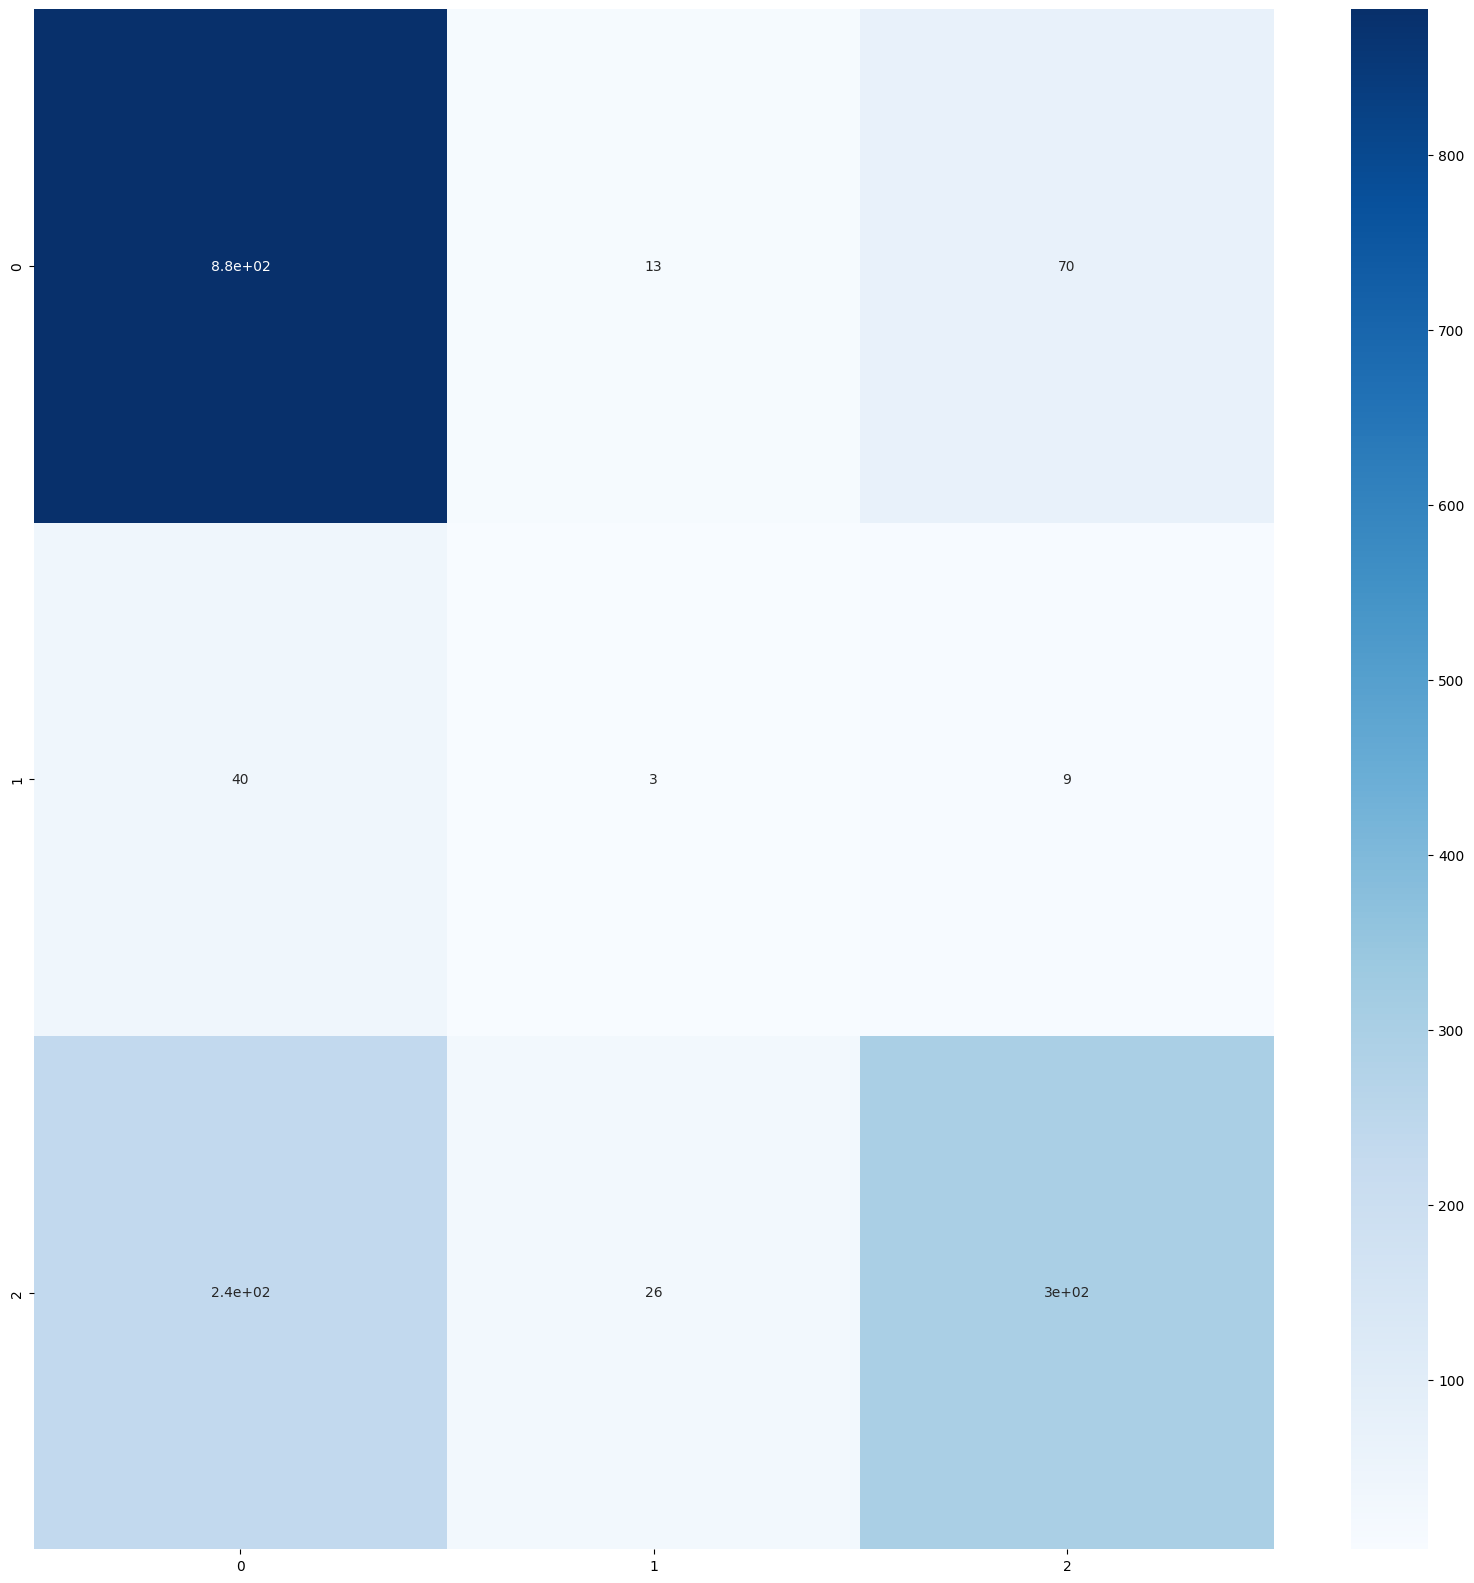

In [349]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
evaluate(y_test,y_pred)

## Training Vector Machines SVM

Training the model
[LibSVM]*
optimization finished, #iter = 855
obj = -98.227361, rho = -0.927737
nSV = 238, nBSV = 59
*.*
optimization finished, #iter = 1159
obj = -523.222397, rho = 0.484408
nSV = 740, nBSV = 512
*
optimization finished, #iter = 432
obj = -94.899432, rho = 1.001722
nSV = 194, nBSV = 69
Total nSV = 868
0.0
Accuracy:  0.8545224541429475
Recall Score:  0.5789530892820722


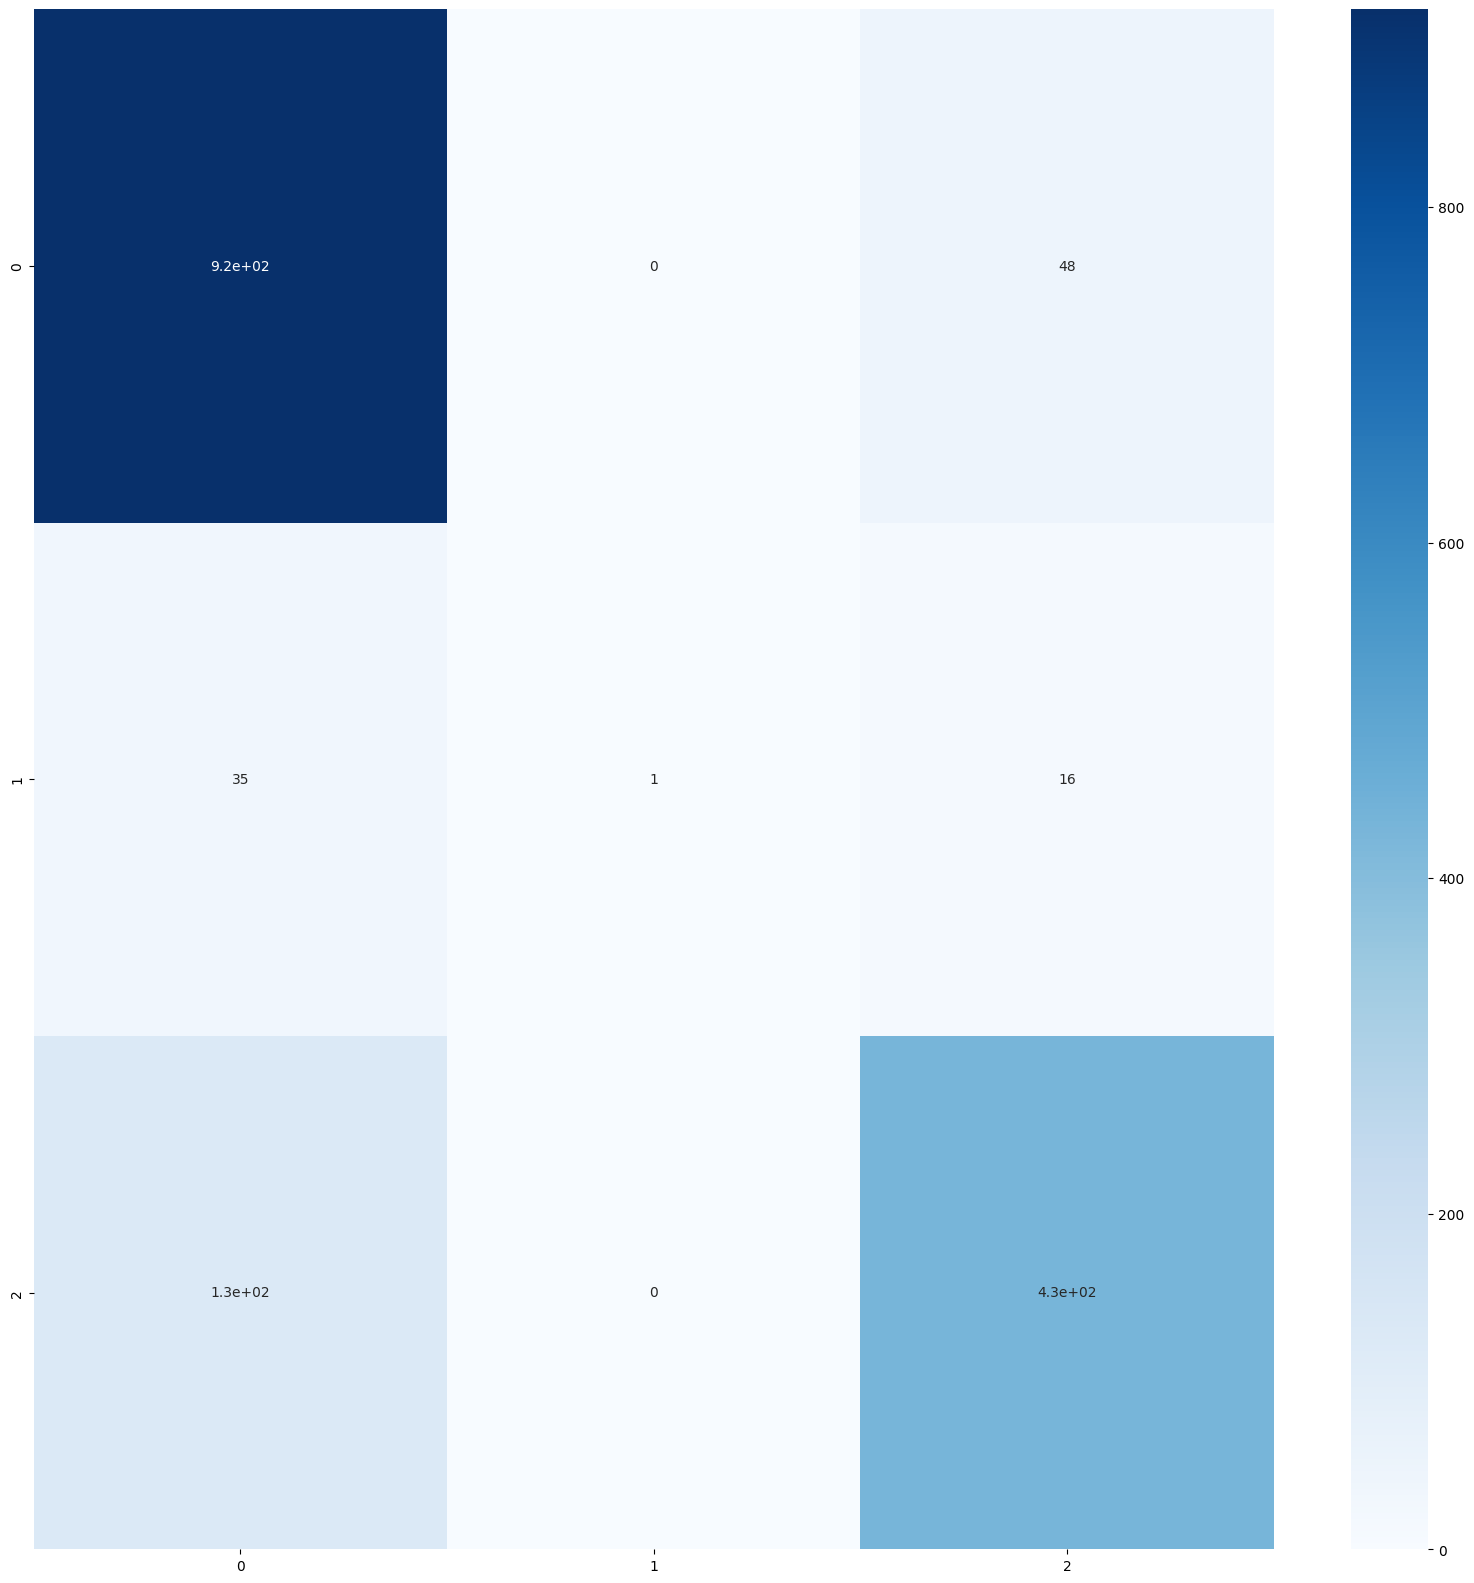

In [350]:
from sklearn.svm import SVC
svm = SVC(verbose=1) # n_neighbors is the number of neighbors to consider when predicting a class label for
print ('Training the model')
svm.fit(X_test,y_test)
print(svm.score(X_train,y_train))
y_pred=svm.predict(X_test)
evaluate(y_test,y_pred)

## Training MLP Classifier

Training the model
0.7966476913345983
Accuracy:  0.7950664136622391
Recall Score:  0.5246436876292463


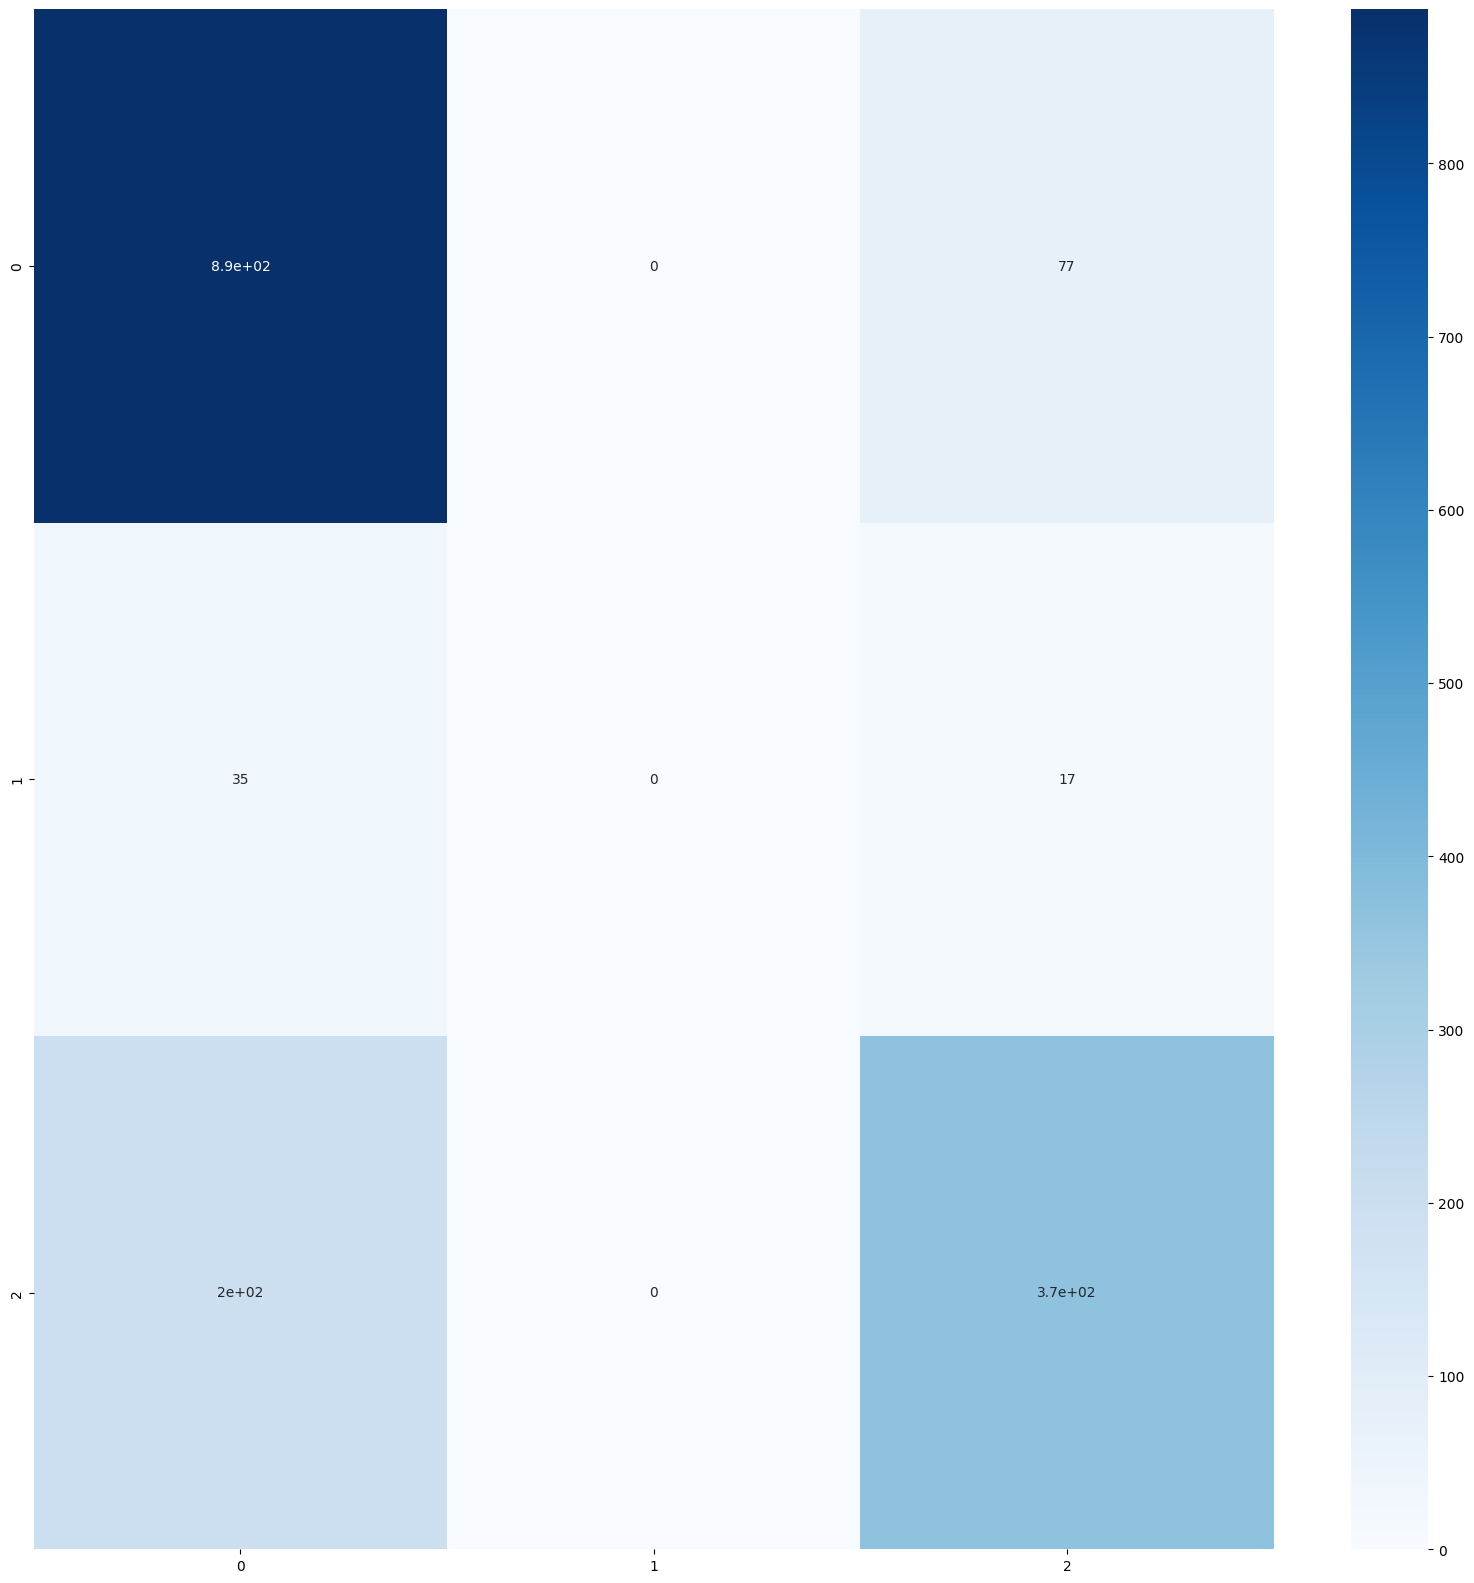

In [351]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', 
              max_iter =10000, 
              alpha=10, 
              hidden_layer_sizes=100, 
              random_state=5,
              activation='identity',
              batch_size=360, 
              learning_rate='adaptive', 
              verbose=0,
              early_stopping=0, 
              n_iter_no_change=100)

print ('Training the model')
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_pred=clf.predict(X_test)
evaluate(y_test,y_pred)

# Preparing the Submission

In [352]:
X_test=test_df.drop(['id'], axis=1)

y_pred_proba=clf.predict_proba(scale(X_test))

In [353]:
assert y_pred_proba.shape == (test_df.shape[0], 3)
submission_labels = ["Status_C", "Status_CL", "Status_D"]
submission = pd.DataFrame({"id": test_df.id, **dict(zip(submission_labels, y_pred_proba.T))})  
submission.to_csv('submission.csv', index=False)  